In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import pycaret.classification as pc
from sklearn.metrics import log_loss, f1_score
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient


In [2]:
X_train = pd.read_parquet('../../data/processed/base_train.parquet')
X_test = pd.read_parquet('../../data/processed/base_test.parquet')

In [3]:
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)

def plot_parameter_validation_curve(X, y,
                                    param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    figure = plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = X, 
                                                 y = y, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    return figure


In [5]:
mlflow.set_tracking_uri("sqlite:///../mlruns.db")

experiment_name = 'Projeto Kobe'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

2024/04/06 17:07:20 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/04/06 17:07:20 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

,Description,Value
0,Session id,7023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(19473, 19)"
5,Transformed train set shape,"(15416, 19)"
6,Transformed test set shape,"(4057, 19)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5416,0.0000,0.5949,0.5173,0.5533,0.0872,0.0882,0.1700
lr,Logistic Regression,0.5837,0.0000,0.4441,0.5838,0.5043,0.1569,0.1612,0.1660


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5874,0.5985,0.4239,0.5954,0.4952,0.1627,0.1694


Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-se

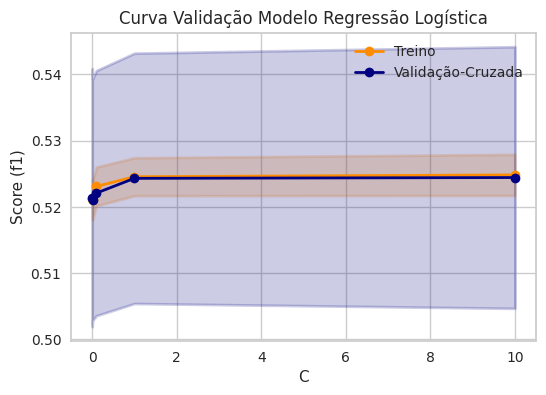

WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-se

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5403,0.5154,0.5870,0.5163,0.5494,0.0841,0.0849


Parameter: max_depth
GridSearch: [2, 3, 4, 5, 6, 7, 8]
Scoring: f1


WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-se

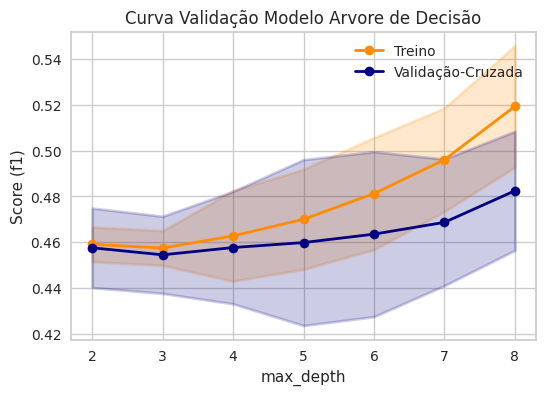

WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNI [matplotlib.font_manager] findfont: Generic family 'sans-se

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5884,0.0000,0.4845,0.5823,0.5289,0.1689,0.1712
1,0.5847,0.0000,0.5220,0.5706,0.5452,0.1645,0.1651
2,0.5903,0.0000,0.4981,0.5831,0.5372,0.1737,0.1754
3,0.5712,0.0000,0.4877,0.5583,0.5207,0.1359,0.1369
4,0.5921,0.0000,0.4800,0.5895,0.5292,0.1760,0.1789
5,0.5773,0.0000,0.4645,0.5705,0.5121,0.1461,0.1485
6,0.5422,0.0000,0.4335,0.5250,0.4749,0.0756,0.0767
7,0.6063,0.0000,0.5187,0.6018,0.5572,0.2063,0.2081
8,0.5752,0.0000,0.4755,0.5653,0.5165,0.1427,0.1444


Fitting 10 folds for each of 4 candidates, totalling 40 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5800,0.5985,0.4600,0.5752,0.5112,0.1509,0.1538


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Successfully registered model 'modelo_kobe'.
Created version '1' of model 'modelo_kobe'.


In [6]:

model_version = -1
registered_model_name = 'modelo_kobe'
nexamples = 5

with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento'):
    exp = pc.setup(data=X_train, target='shot_made_flag', test_data=X_test, normalize=True,
                 remove_multicollinearity=True, multicollinearity_threshold=0.95,
                 polynomial_features=True,  remove_outliers=True,
                 log_experiment=False,  fold_strategy='stratifiedkfold')

    list_models = pc.compare_models(['lr', 'dt'], n_select=2, sort='f1')
    
    #Regressão Logística
    yhat_test = exp.predict_model(list_models[1])
    
    figure = plot_parameter_validation_curve(X_train.drop('shot_made_flag', axis = 1), 
                                             X_train['shot_made_flag'], 
                                             'C', 
                                             {'C': [0.001, 0.01, 0.1, 1, 10]}, 
                                             list_models[1], 
                                             'Regressão Logística', 
                                             'f1', 
                                             logx=False)            
    
    mlflow.log_metrics({
        'lr_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'lr_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    figure.savefig('lr_validation_curve.png')
    
    #Arvore de Decisão
    yhat_test = exp.predict_model(list_models[0])
    
    figure = plot_parameter_validation_curve(X_train.drop('shot_made_flag', axis = 1), 
                                             X_train['shot_made_flag'], 
                                             'max_depth', {'max_depth': [2, 3, 4, 5, 6, 7, 8]}, 
                                             list_models[0], 'Arvore de Decisão',
                                             'f1', 
                                             logx=False)
    
    mlflow.log_metrics({
        'dt_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'dt_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    figure.savefig('dt_validation_curve.png')
    
    tune_model = exp.tune_model(
        list_models[1], 
        optimize='f1',
        search_library='scikit-learn',
        search_algorithm='random',
        n_iter=4)
    
    yhat_test = exp.predict_model(tune_model)
    
    mlflow.log_metrics({
        'tuned_model_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'tuned_model_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    final_model = exp.finalize_model(tune_model)
    
    #EPORTANDO O MODELO
    exp.save_model(final_model, f'./{registered_model_name}') 
    # Carrega novamente o pipeline + bestmodel
    model_pipe = exp.load_model(f'./{registered_model_name}')
    # Assinatura do Modelo Inferida pelo MLFlow
    model_features = list(X_train.drop('shot_made_flag', axis=1).columns)
    inf_signature = infer_signature(X_train[model_features], model_pipe.predict(X_train.drop('shot_made_flag', axis=1)))
    # Exemplo de entrada para o MLmodel
    input_example = {x: X_train[x].values[:nexamples] for x in model_features}
    # Log do pipeline de modelagem do sklearn e registrar como uma nova versao
    mlflow.sklearn.log_model(
        sk_model=model_pipe,
        artifact_path="sklearn-model",
        registered_model_name=registered_model_name,
        signature = inf_signature,
        input_example = input_example
    )
    # Criacao do cliente do servico MLFlow e atualizacao versao modelo
    client = MlflowClient()
    if model_version == -1:
        model_version = client.get_latest_versions(registered_model_name)[-1].version
    # Registrar o modelo como staging
    client.set_registered_model_alias(
        name=registered_model_name,
        version=model_version, # Verificar com usuario qual versao
        alias="staging"
    )
